In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv(r'C:\Programmieren\Jupyter Lab\Datasets\spotify_data.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 25687: invalid start byte

In [4]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [5]:

jamiroquai_df = df[df['artist_name'] == 'Jamiroquai']
jamiroquai_df


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
120188,120188,Jamiroquai,Virtual Insanity,0xRf0aeTsHnj6OubE7YU2U,32,2014,dance,0.585,0.933,6,-5.779,1,0.1740,0.146000,0.000002,0.3780,0.504,91.993,340640,4
265288,265288,Jamiroquai,Cloud 9,2kX4ykCwUeAVYv6fahnDfG,54,2017,dance,0.888,0.687,2,-7.744,1,0.1070,0.408000,0.000000,0.0615,0.432,115.034,236947,4
265604,265604,Jamiroquai,Automaton,42dJ29C11xlJTLkRVmKty1,47,2017,dance,0.717,0.906,8,-6.985,0,0.0477,0.025200,0.010700,0.0591,0.708,107.996,287960,4
674757,744932,Jamiroquai,Little L,7hhclvecTpNxNNRCk7NUoc,64,2001,dance,0.878,0.724,10,-5.373,0,0.1290,0.168000,0.011600,0.1330,0.904,121.906,295400,4
674769,744948,Jamiroquai,You Give Me Something,1x6jPyUfLuTNQ3o5zykG2x,62,2001,dance,0.639,0.690,7,-10.047,1,0.2640,0.026500,0.000551,0.1460,0.579,119.630,199600,4
674790,744973,Jamiroquai,Love Foolosophy - Radio Edit,0upgxxew2mVAEctrz08jnf,60,2001,dance,0.799,0.690,11,-4.998,0,0.0749,0.011900,0.000029,0.1330,0.896,129.297,224493,4
674869,745066,Jamiroquai,Corner of the Earth,3jmbIhguc5uxiOdZ7ak8H3,50,2001,dance,0.473,0.552,2,-6.621,1,0.0302,0.252000,0.000091,0.2880,0.276,79.486,338960,4
674910,745114,Jamiroquai,Feel So Good,4baXYEQbDjse4afjjToEB6,44,2001,dance,0.737,0.883,8,-6.491,1,0.2380,0.014200,0.004190,0.7130,0.669,122.656,321427,4
674929,745134,Jamiroquai,Picture of My Life,0JSinz03ZGQxKtCH3yBg6W,45,2001,dance,0.674,0.435,2,-8.584,0,0.0293,0.557000,0.000000,0.1730,0.490,120.332,223627,4
675027,745249,Jamiroquai,Main Vein,77wvD68DO1na0pvLMcVASk,38,2001,dance,0.774,0.744,9,-6.914,0,0.0810,0.002790,0.000603,0.1220,0.771,127.591,303133,4


columns_to_print = df.columns[df['artist_name'] == 'Jamiroquai']
print(columns_to_print)

# Data Understanding

    Unnamed: 0: This looks like an index column that was saved with the data. We can probably remove this.
    artist_name: The name of the artist.
    track_name: The name of the track.
    track_id: The unique identifier for the track.
    popularity: A measure of the track's popularity.
    year: The year the track was released.
    genre: The genre of the track.
    danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature: These are various attributes of the song calculated by Spotify. They reflect different aspects of the song like its musical key, tempo, whether it is acoustic or
    not, whether it is instrumental or not, how "live" it sounds, etc.

In [6]:
# Dropping irrelevant columns
# Checking and handling missing data
# Checking for and handling duplicate rows
# Converting data to appropriate types if necessary

# Drop the 'Unnamed: 0' column as it's not needed
df.drop('Unnamed: 0', axis=1, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

missing_values, duplicate_rows

(artist_name         15
 track_name           1
 track_id             0
 popularity           0
 year                 0
 genre                0
 danceability         0
 energy               0
 key                  0
 loudness             0
 mode                 0
 speechiness          0
 acousticness         0
 instrumentalness     0
 liveness             0
 valence              0
 tempo                0
 duration_ms          0
 time_signature       0
 dtype: int64,
 0)

# Exploratory Data Analysis (EDA)

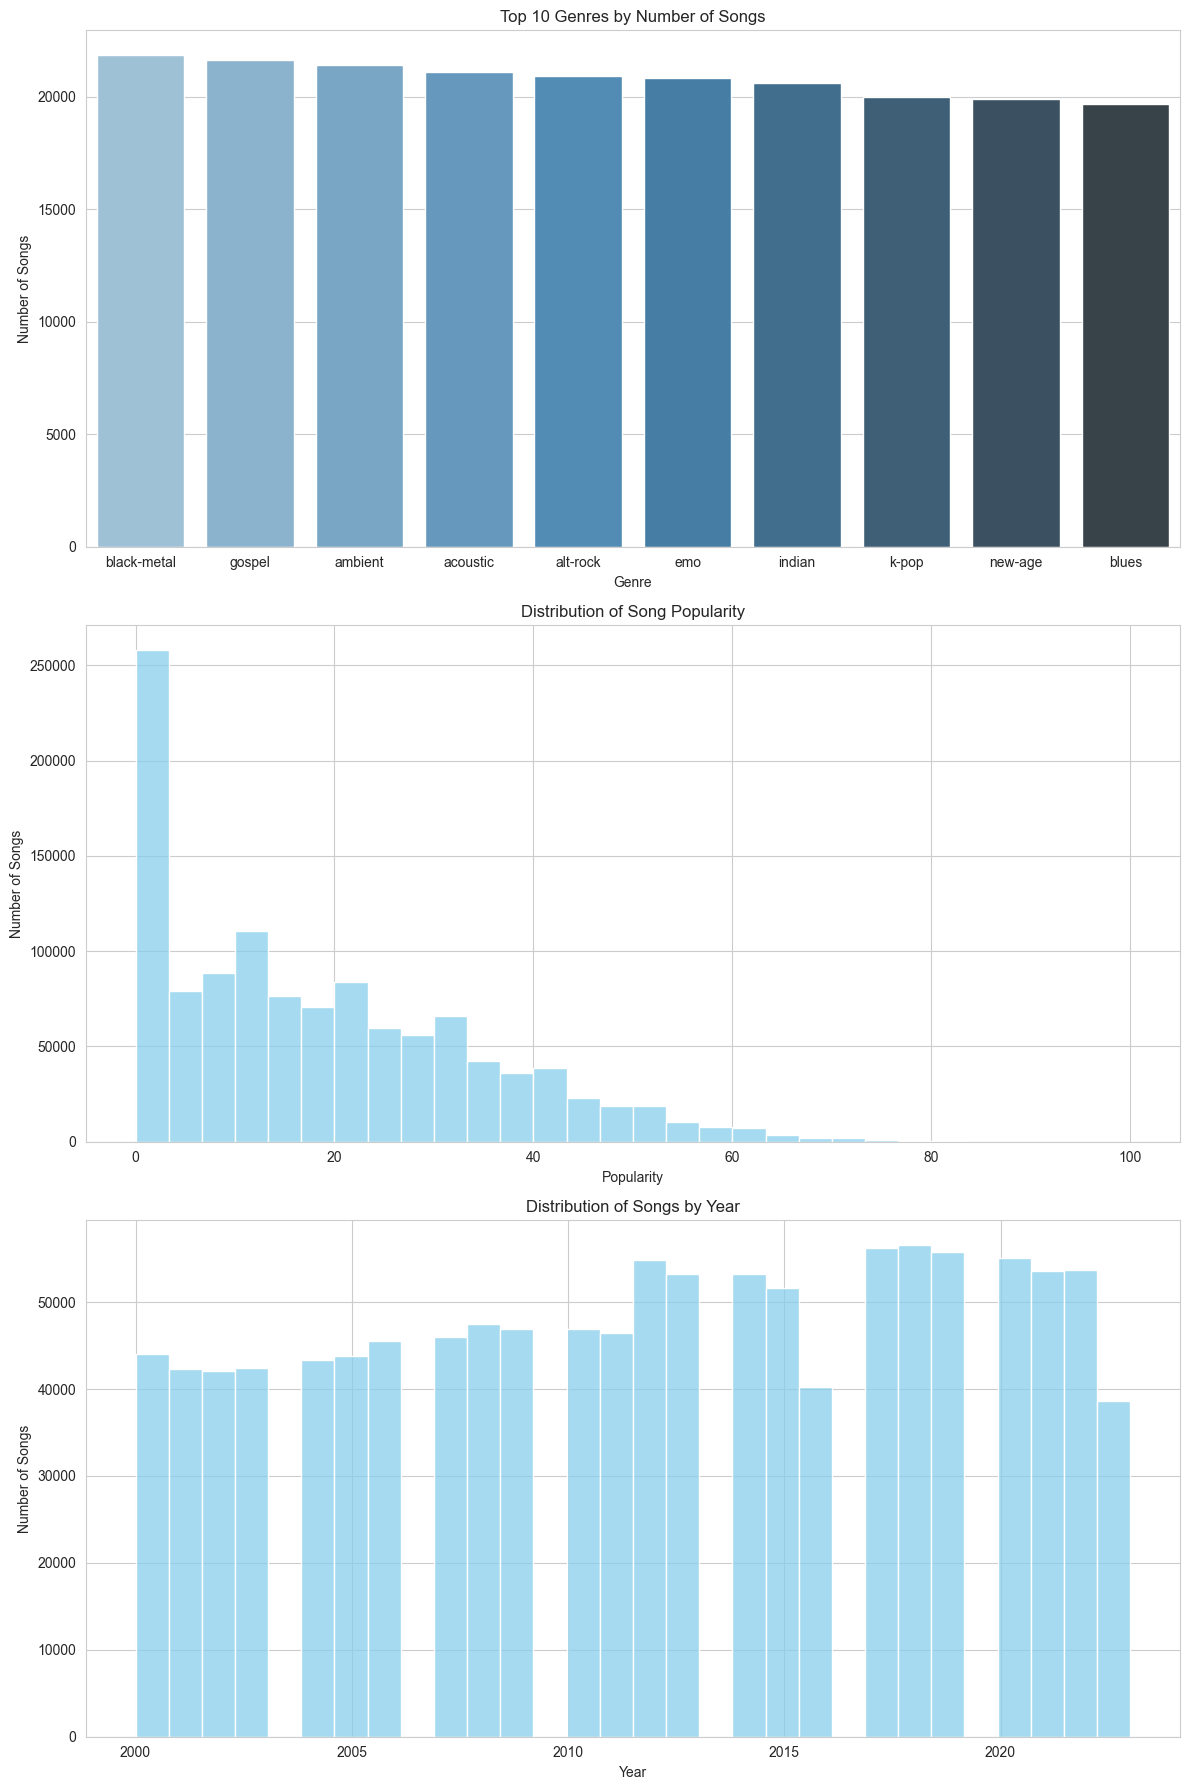

In [7]:
# Set the style of the plots
sns.set_style('whitegrid')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot distribution of songs across genres
genre_counts = df['genre'].value_counts().head(10)
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 10 Genres by Number of Songs')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Number of Songs')

# Plot distribution of song popularity
sns.histplot(df['popularity'], bins=30, ax=axs[1], color='skyblue')
axs[1].set_title('Distribution of Song Popularity')
axs[1].set_xlabel('Popularity')
axs[1].set_ylabel('Number of Songs')

# Plot distribution of songs across years
sns.histplot(df['year'], bins=30, ax=axs[2], color='skyblue')
axs[2].set_title('Distribution of Songs by Year')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

Results:

- Top 10 Genres per year: Most common genre in this dataset is dance pop, followed by pop, rap, pop rap. This dataset is skewed towards popular music
- Distribution of Song Popularity: Most are unknown the rest is relatively linear
- Distribution of Songs by Year: Increasing number of songs per year and popularity

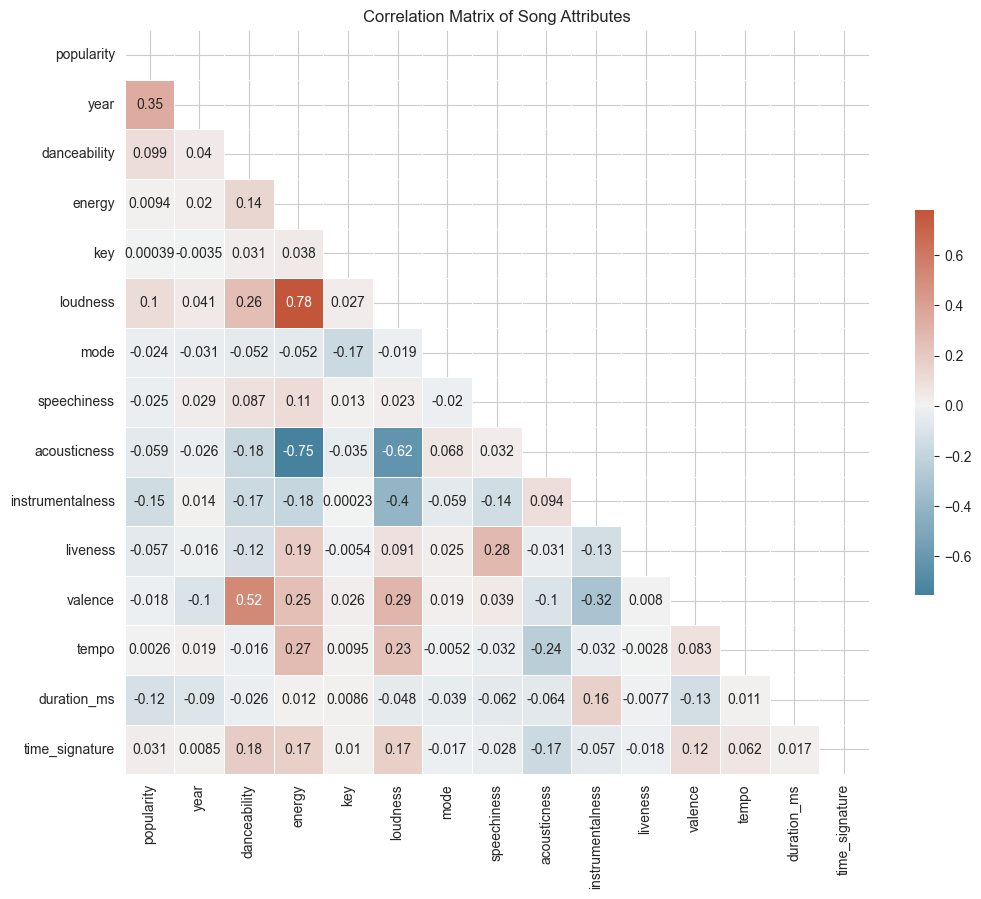

In [8]:
# Select numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of Song Attributes')
plt.show()


In [9]:
import json

# Load the LoL champions data
with open('C:\\Users\\nicol\\Desktop\\leaguify\\public\\data\\Championinformation.json') as f:
    lol_champions_data = json.load(f)

# Display the data structure
lol_champions_data.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [10]:
# Explore the data key
champions_data = lol_champions_data['data']

# Print the keys for the first champion
first_champion_key = list(champions_data.keys())[0]
champions_data[first_champion_key].keys()

dict_keys(['version', 'id', 'key', 'name', 'title', 'blurb', 'info', 'image', 'tags', 'partype', 'stats'])

# Recommendation System I 

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalize song features
# Adjust song features to match champion features
song_features = ['energy', 'tempo', 'acousticness', 'instrumentalness', 'popularity']

# Adjust champion features to match song features
champion_features = ['attack', 'attack', 'magic', 'magic', 'difficulty']

# Function to recommend songs based on a given song and champion
def recommend_songs(favorite_song, favorite_champion):
    # Get the features of the favorite song and champion
    song_features_values = df[df['track_name'] == favorite_song][song_features].values[0]
    champion_features_values = [champions_data[favorite_champion]['info'][feature] for feature in champion_features]
    
    # Calculate the difference between the song and champion features
    diff = np.abs(np.array(song_features_values) - np.array(champion_features_values))
    
    # Calculate a score for each song based on the difference to the favorite song and champion
    df['score'] = diff.sum(axis=0)
    
    # Get the top 20 songs with the lowest score 
    recommended_songs = df.nsmallest(20, 'score')[['track_name', 'artist_name']].values
    
    return recommended_songs

# Test the recommendation function
recommend_songs('Virtual Insanity - Remastered', 'Ahri')

array([["I Won't Give Up", 'Jason Mraz'],
       ['93 Million Miles', 'Jason Mraz'],
       ['Do Not Let Me Go', 'Joshua Hyslop'],
       ['Fast Car', 'Boyce Avenue'],
       ["Sky's Still Blue", 'Andrew Belle'],
       ['What They Say', 'Chris Smither'],
       ['Walking in a Winter Wonderland', 'Matt Wertz'],
       ['Dancing Shoes', 'Green River Ordinance'],
       ['Living in the Moment', 'Jason Mraz'],
       ['Heaven', 'Boyce Avenue'],
       ['Say Anything', 'Tristan Prettyman'],
       ["Money (That's What I Want) - From Jim Beam's Live Music Series",
        'David Gray'],
       ['Someone Like You', 'Boyce Avenue'],
       ['The Woman I Love', 'Jason Mraz'],
       ['I Shall Be Released', 'Eddie Vedder'],
       ['Kingdom Come', 'The Civil Wars'],
       ['Home', 'Gabrielle Aplin'],
       ['Transvestities Can Be Cannibals Too', 'Harley Poe'],
       ['One Grain of Sand', 'Ron Pope'],
       ['Once Upon Another Time', 'Sara Bareilles']], dtype=object)

# Recommendation System II

Steps:
- Normalize song features
- Use a k-NN model or cosine similarity to find songs that are similar to the userÄs favourite song
- Create a filter based on the favourite champion's attribute
- Apply the filter to the list of recommendet songs to get a final recommendation

1. The features of each song are used as dimensions in a multi-dimensional space. Each song is represented as a point in this space.

2. The system takes a list of songs that a user likes and calculates a "center" point in this multi-dimensional space based on these songs. This is done by taking the mean (average) of the feature vectors of the input songs.

3. The system then recommends the songs that are closest to this "center" point. The "distance" between two points is calculated using the Euclidean distance metric.

4. The system scales the features of the songs before calculating the distances. This is done using a StandardScaler, which standardizes features by removing the mean and scaling to unit variance. This ensures that all features contribute equally to the distance calculation.

In [12]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib
from sklearn.preprocessing import StandardScaler

# Update the columns to use in the model
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def find_song(name, year):
    """
    Function to find a song in the provided Spotify data.
    """
    song_data = defaultdict()
    results = df.loc[(df['track_name'].str.lower() == name.lower()) & (df['year'] == year)]
    
    if results.empty:
        return None

    results = results.iloc[0]
    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for col in number_cols:
        song_data[col] = results[col]

    return pd.DataFrame(song_data)

# Test the find_song function
find_song('Automaton', 2017)

,name,year,duration_ms,popularity,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,Automaton,2017,287960,47,0.708,0.0252,0.717,0.906,0.0107,8,0.0591,-6.985,0,0.0477,107.996


In [13]:
def get_song_data(song, spotify_data):
    """
    Function to get the data of a song.
    """
    try:
        song_data = spotify_data[(spotify_data['track_name'].str.lower() == song['name'].lower()) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    except IndexError:
        return find_song(song['name'], song['year'])

def get_mean_vector(song_list, spotify_data):
    """
    Function to get the mean vector of a list of songs.
    """
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            song_data = spotify_data.mean()
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def recommend_songs(song_list, spotify_data, n_songs=10):
    """
    Function to recommend songs based on a list of songs.
    """
    metadata_cols = ['track_name', 'year', 'artist_name']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = StandardScaler()
    scaler.fit(spotify_data[number_cols])
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = euclidean_distances(scaled_song_center, scaled_data)
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['track_name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

def flatten_dict_list(dict_list):
    """
    Function to flatten a list of dictionaries into a single dictionary.
    """
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict

# Test the recommend_songs function again
recommend_songs([{'name': 'Automaton', 'year':2017},],  df)

c:\Users\nicol\miniconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'track_name': 'Dive', 'year': 2017, 'artist_name': 'Coast Modern'},
 {'track_name': 'Super Psycho Love',
  'year': 2016,
  'artist_name': 'Simon Curtis'},
 {'track_name': 'Voices', 'year': 2018, 'artist_name': 'Against The Current'},
 {'track_name': 'Ahora Lloras Tú (feat. CNCO)',
  'year': 2018,
  'artist_name': 'Ana Mena'},
 {'track_name': 'One Trick Ponies', 'year': 2018, 'artist_name': 'Kurt Vile'},
 {'track_name': 'Ando buscando (feat. Piso 21)',
  'year': 2019,
  'artist_name': 'Carlos Baute'},
 {'track_name': 'Se Acabó el Amor - Urban Version',
  'year': 2018,
  'artist_name': 'Abraham Mateo'},
 {'track_name': 'Big Shot', 'year': 2016, 'artist_name': '3rd Force'},
 {'track_name': 'Savages', 'year': 2015, 'artist_name': 'MARINA'}]